In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.shape

(999, 12)

In [5]:
dataset.columns = ["id","score","Estado", "Genero","Idade","Patrimonio","Saldo","Produtos","TemCartaoCredito", "Ativo","Salario","Saiu"]

In [6]:
dataset.head()

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

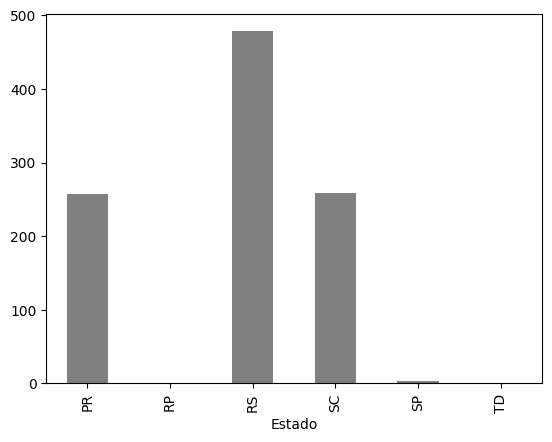

In [8]:
agrupado.plot.bar(color = 'gray')

In [9]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

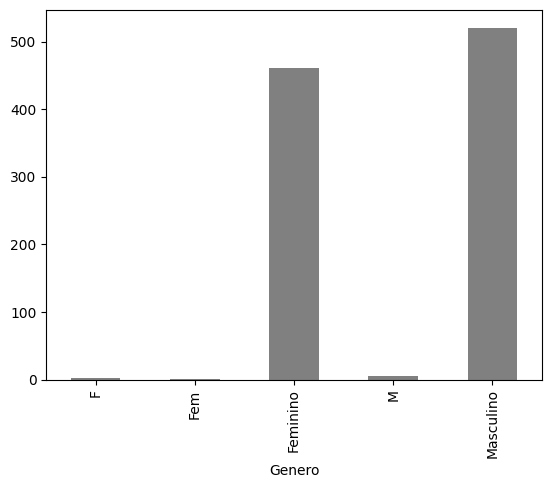

In [10]:
agrupado.plot.bar(color = 'Gray')

In [12]:
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'score')

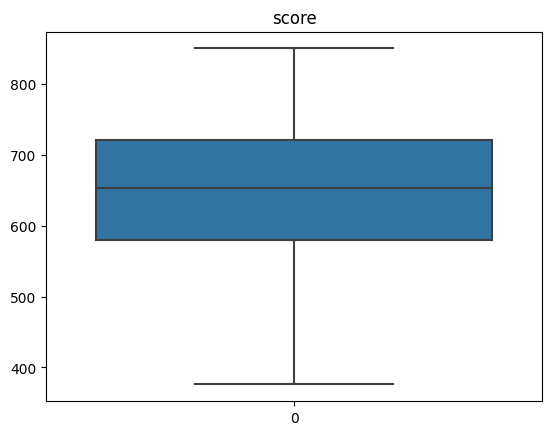

In [15]:
srn.boxplot(dataset['score']).set_title('score')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

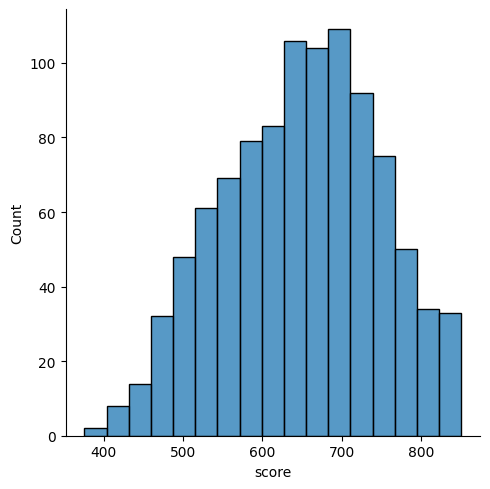

In [21]:
srn.displot(dataset['score']).set_title('Score')

In [17]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

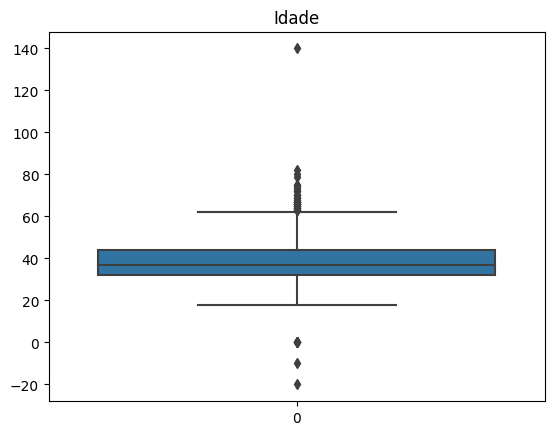

In [18]:
srn.boxplot(dataset['Idade']).set_title('Idade')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

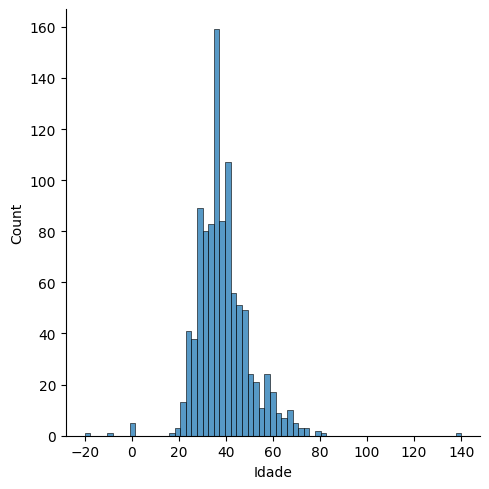

In [22]:
srn.displot(dataset['Idade']).set_title('Idade')

In [24]:
#contamos valores NAN(nao disponivel, não foi preenchido)
#genero e salário
dataset.isnull().sum()

id                  0
score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [26]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [28]:
dataset['Salario'].fillna(mediana, inplace=True)

In [29]:
dataset['Salario'].isnull().sum()

0

In [30]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [31]:
dataset['Genero'].isnull().sum()

8

In [32]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [33]:
dataset['Genero'].isnull().sum()

0

In [34]:
#padronização
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = "Feminino"
#Visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [36]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [37]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [38]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [39]:
#substituição
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [40]:
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] > 120)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [42]:
dataset[dataset.duplicated(['id'], keep=False)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [43]:
dataset.drop_duplicates(subset='id', keep='first',inplace=True)
dataset[dataset.duplicated(['id'], keep=False)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
